# Student Education Analysis
- We have a dataset containing information about student and some factors effecting their studies.

<img style="width:300px; float:left;" src="assets/galelio.jpeg"/>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Features
- school
- gender
- age
- address
- famsize
- Pstatus
- Medu
- Fedu
- Mjob
- Fjob
- reason
- guardian
- traveltime
- studytime
- failures
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic
- famrel
- freetime
- goout
- Dalc
- Walc
- health
- absences
- passed

In [2]:
df = pd.read_csv("student-data.csv")
features=list(df.keys())

In [3]:
features

['school',
 'gender',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'passed']

[]

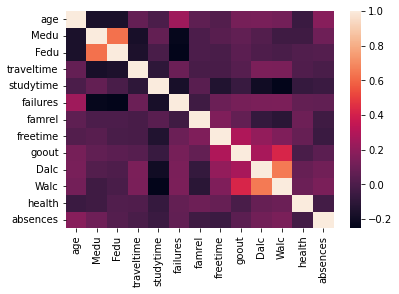

In [4]:
sns.heatmap(df.corr())
plt.plot()

## Students Examination obeservations
- By Analysing Graph below we can see
    - 67.1% of students passed the exams
    - 32.9% of students failed the exam

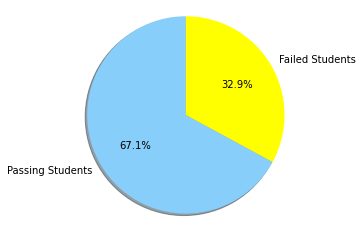

In [5]:
labels = 'Passing Students', 'Failed Students'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [6]:
df["goout"].unique()

array([4, 3, 2, 1, 5])

## Analysis of students Going out
- By graph below we can see that
    - Most of the students Go out for 3-3.5 hrs
    - On second place students go out for 2hrs

[]

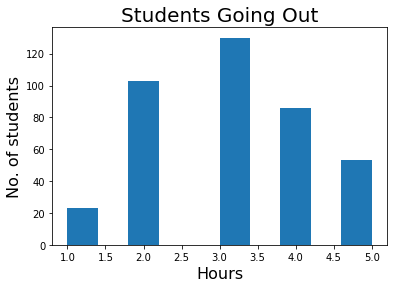

In [7]:
plt.hist(df["goout"])
plt.title('Students Going Out', fontsize=20)
plt.ylabel('No. of students', fontsize=16)
plt.xlabel('Hours', fontsize=16)
plt.plot()

## Gender Distribution of students
- Shockingly most of the students in this dataset are female

[]

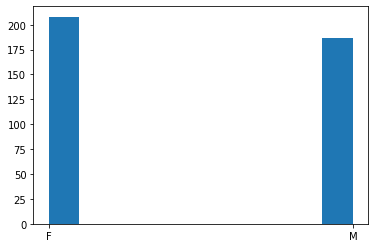

In [8]:
plt.hist(df["gender"])
plt.plot()

## Internet availablity
- As per graph Most of students have internet access

[]

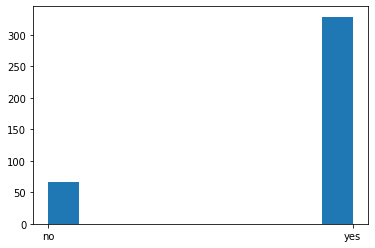

In [9]:
plt.hist(df["internet"])
plt.plot()

## Mother job
- Mother's of most of student work in other jobs
- Second place they work at services
- level of teacher and houswife are same

[]

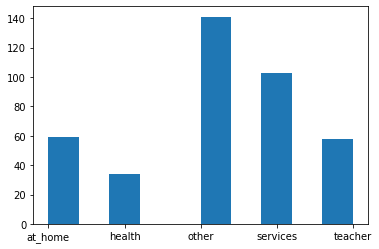

In [10]:
plt.hist(df["Mjob"])
plt.plot()

## Parents job father
- As per the graph you can observe
    - Most of Fathers have job in other category instead of major job fields
    - On second place fathers are in services

[]

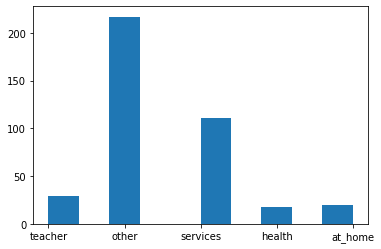

In [11]:
plt.hist(df["Fjob"])
plt.plot()

## Study time of students
- Most of the students self-study for only 2hrs
- Second place they study for 1 hr


[]

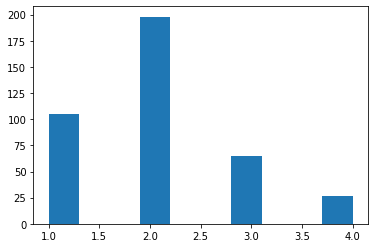

In [12]:
plt.hist(df["studytime"])
plt.plot()

## Manual Conversion to Categorical

In [13]:
def numerical_data():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['gender'] = df['gender'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col

def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [14]:
numerical_data()
# feature_scaling(df)

## Coorelation with student status

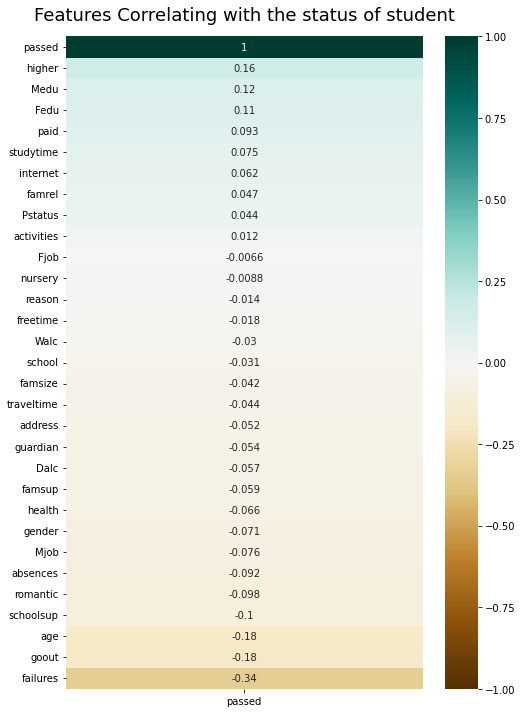

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

## Effect of Relationship and Going out

Text(0.5, 0, 'Student status')

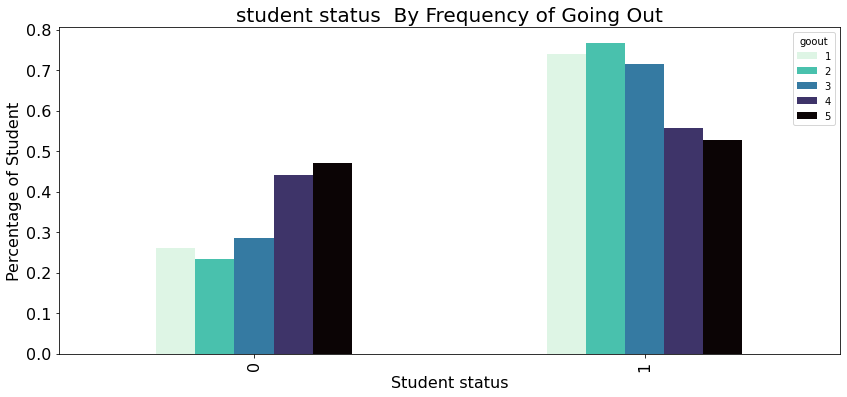

In [16]:
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

### Conclusions from above graph:
- Most of students who passed exams were having less hours of going out.
- Most of student who passed exams were having no romantic relationship.

## Effect of Mothers Education:

<Figure size 432x288 with 0 Axes>

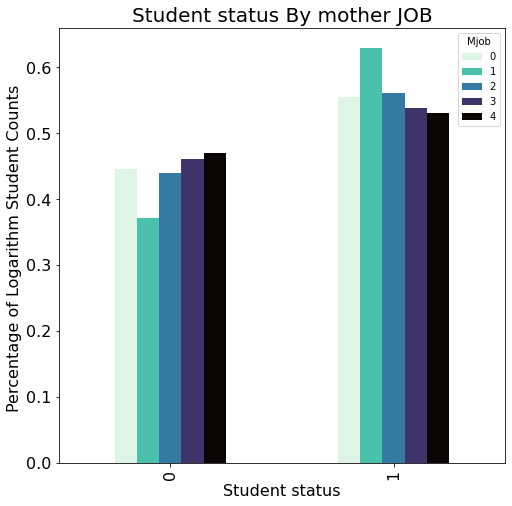

In [17]:
mjob_tab1 = pd.crosstab(index=df.passed, columns=df.Mjob)
mjob_tab = np.log(mjob_tab1)
mjob_perc = mjob_tab.apply(perc).reindex(index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By mother JOB', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()

### Observations:
- Mother eduaction effects status of student studies a lot

## Effect on Higher Education

Text(0, 0.5, 'Percentage of Student')

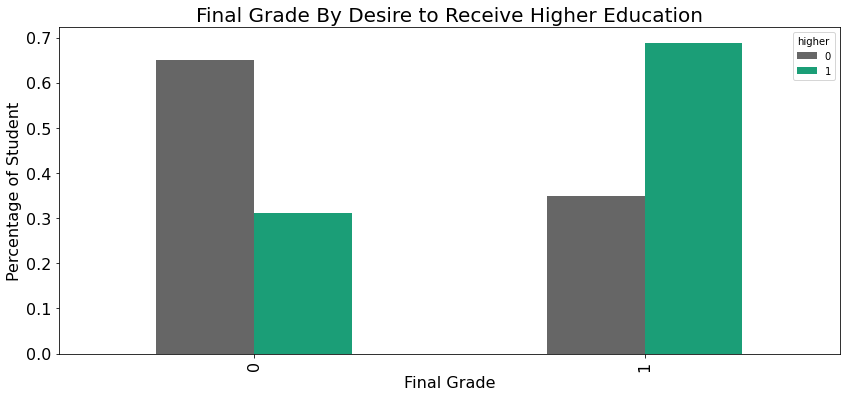

In [18]:
higher_tab = pd.crosstab(index=df.passed, columns=df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

### Observations
- Students who passed exams were having high desire of taking higer education.

## Effect of Internet Availablity

Text(0, 0.5, 'Percentage of Student')

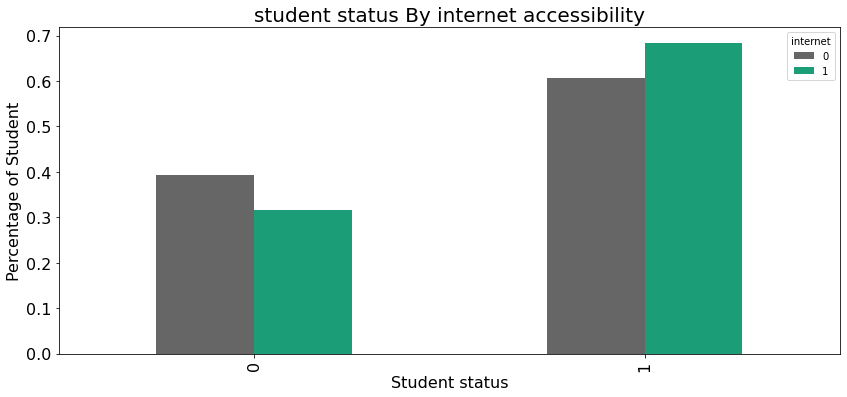

In [19]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

### Observation:
- Students having internet connection passed the exams mostly

# **Final Observation**
- There are many factors effecting education of students.Our dataset contains majority of them.We analysed which factors were affecting in what ways.As we have seen above graphs we can say that mothers education effects student and students having a romantic relationship were mostly distracted from there goal of passing exams,Not to forget internet played a positive role in analysis,most of students having internet connection passed.